In [30]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx
/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.arff


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing dataset and doing EDA

In [32]:
beans = pd.read_excel("/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

In [33]:
beans.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [34]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [35]:
beans.shape

(13611, 17)

In [36]:
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [37]:
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [38]:
beans['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [39]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

* There is 7 unique types of beans in "Class" Column
* BOMBAY occurs the least amount of times in dataset
* DERMASON most often appears in our dataset

#### Class Column Visualisation

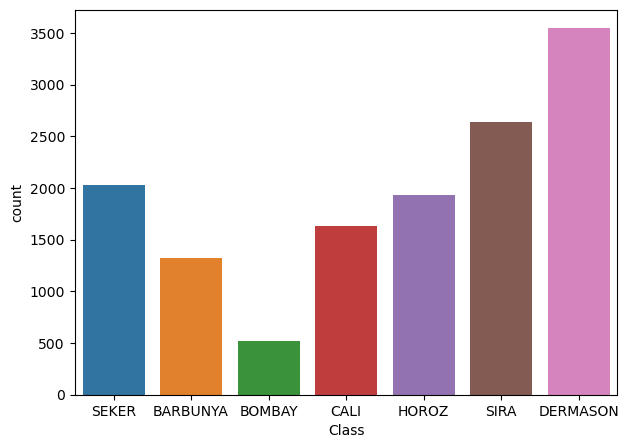

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=beans)
plt.show()

In [41]:
columns = beans.columns.tolist()
columns

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

In [42]:
feature_cols = columns[:-1]

feature_cols

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

#### Correlation Heatmap

In [43]:
corr_values = beans[feature_cols].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

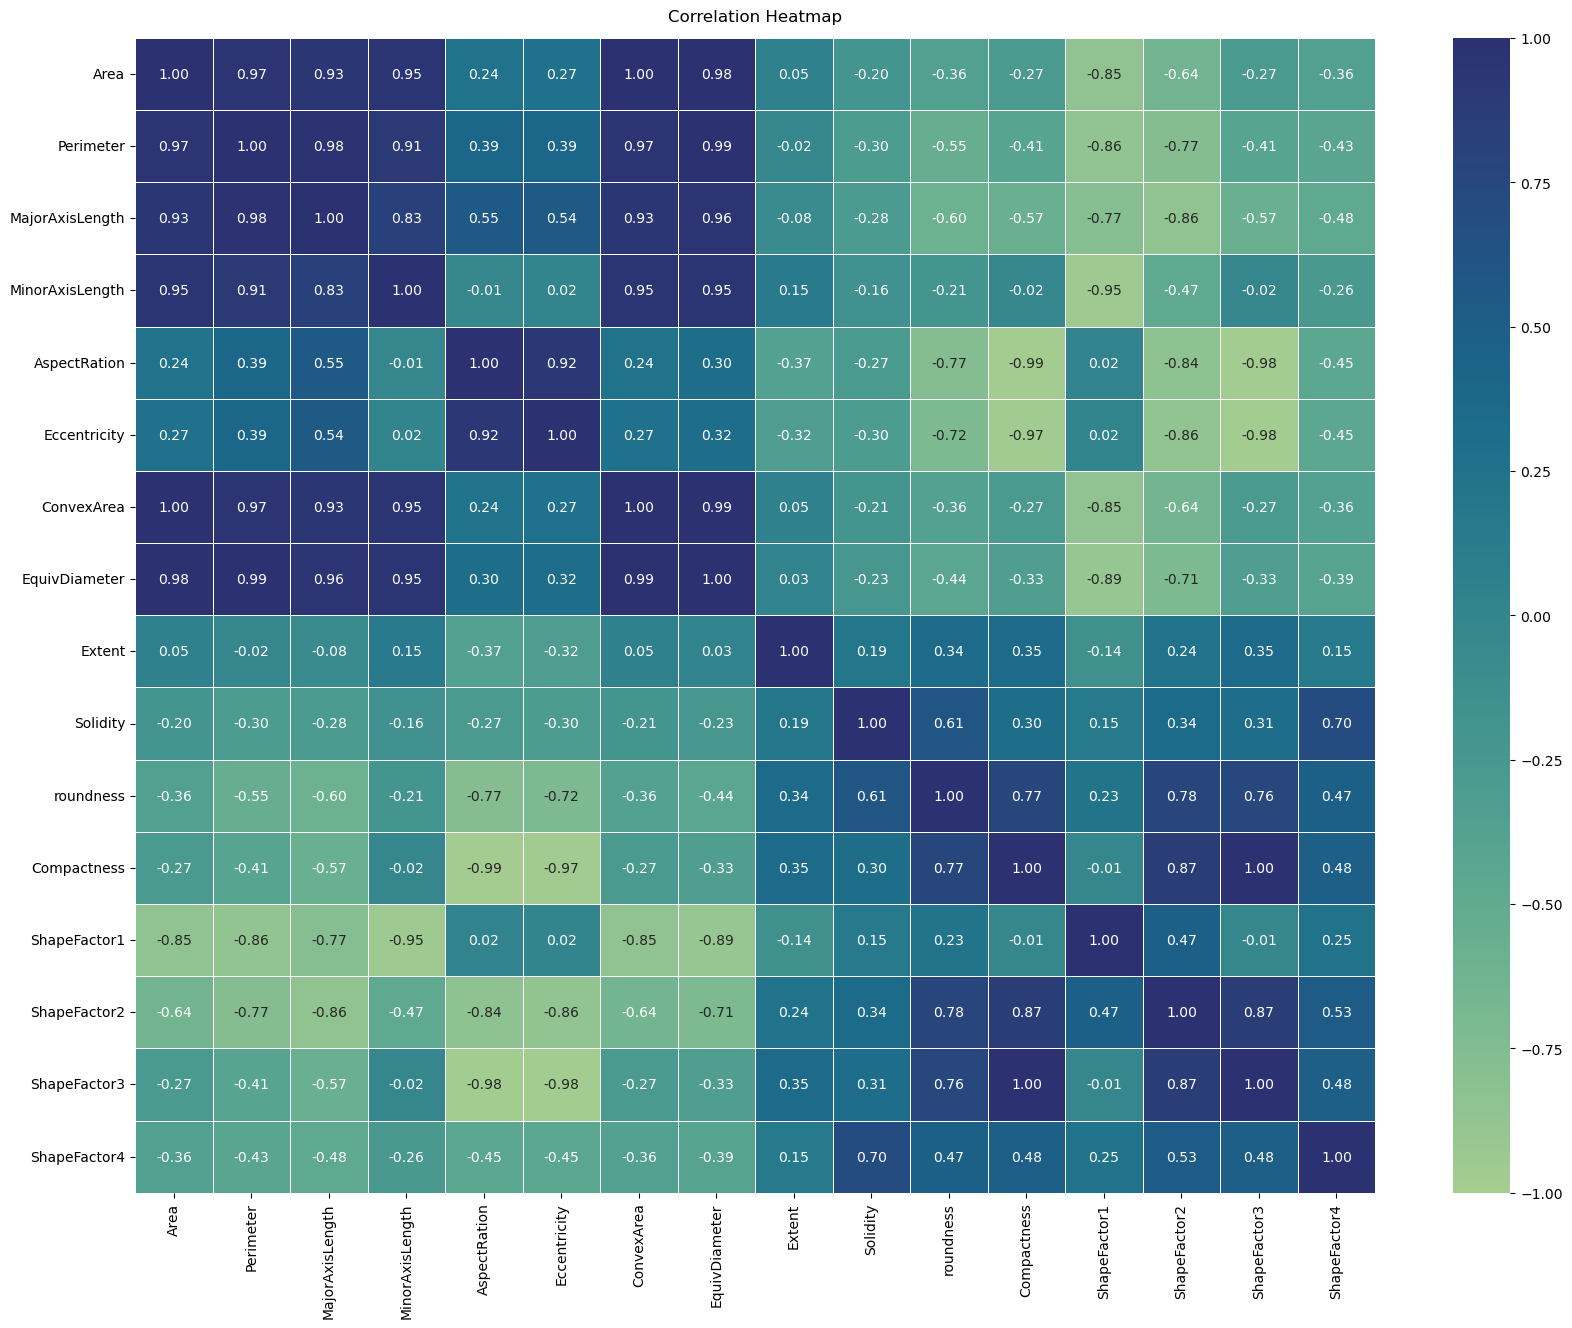

In [44]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(corr_values, vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Attribute Histogram

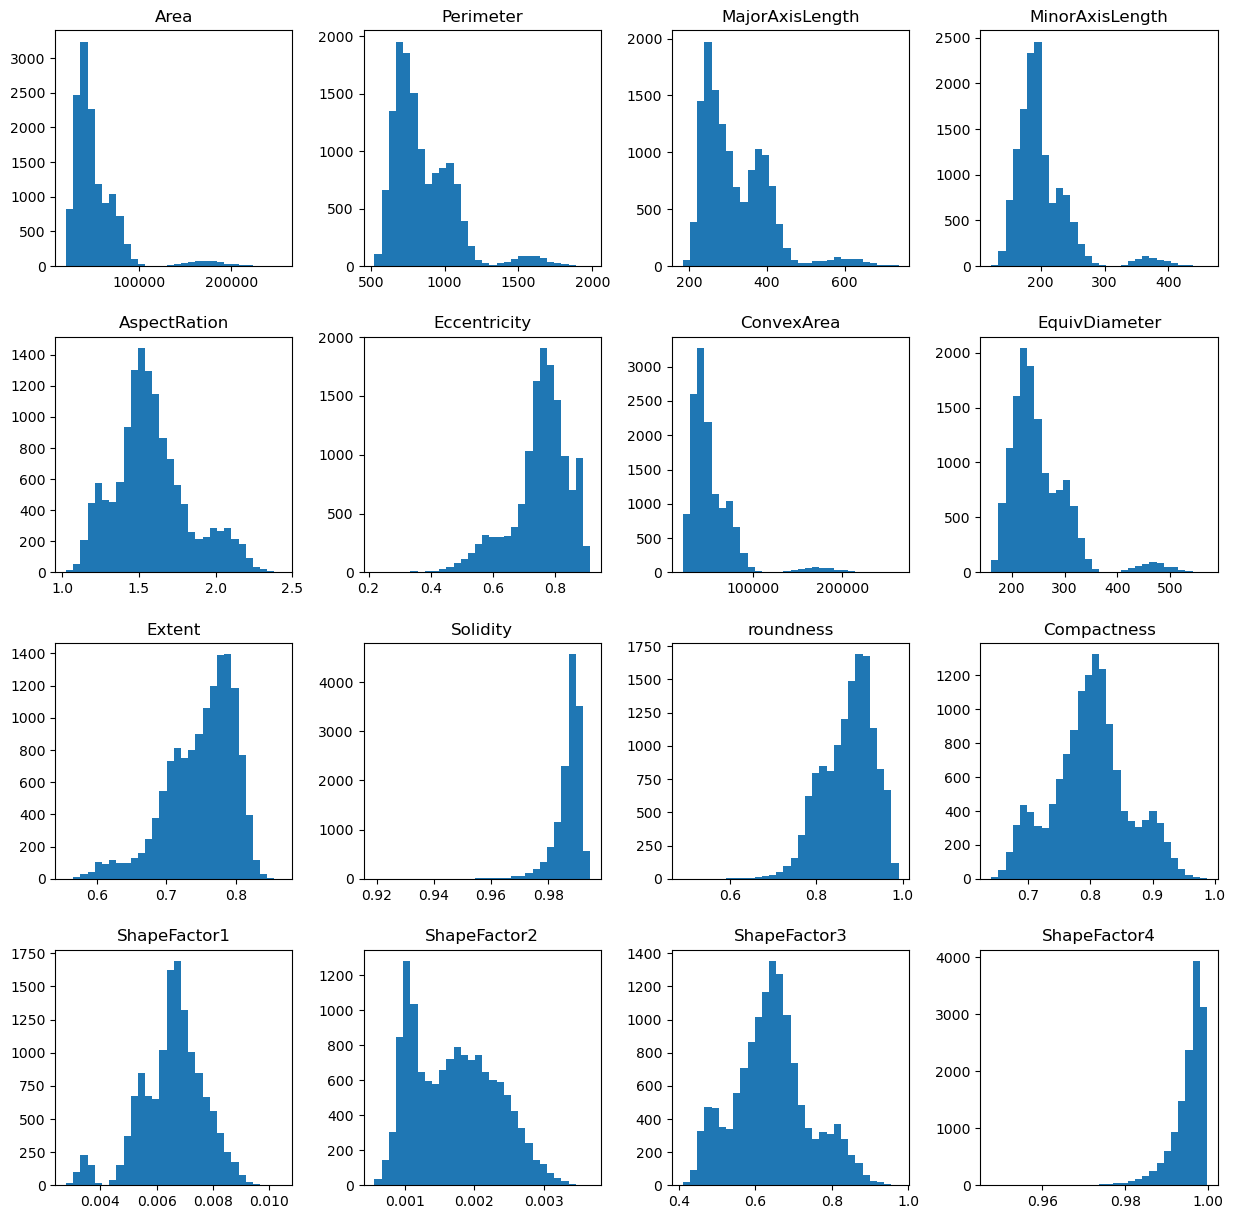

In [45]:
beans.hist(bins=30, figsize=(15,15),grid=False)
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


## Label Encoding

##### "Class" column is str so we need to convert the labels into a numeric form

In [47]:
labelencoder = LabelEncoder()
beans["Class"] = labelencoder.fit_transform(beans['Class'])

beans.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


### Importing Libraries

In [48]:
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

In [49]:
# Data Splitting
x= beans.iloc[:,:-1].values  
y= beans.iloc[:, -1].values

In [50]:
x

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [51]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [52]:
# Train Test Split
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

 # LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [55]:
y_pred=regressor.predict(x_test)
acc_log = round(regressor.score(x_train, y_train) * 100, 2)
acc_log

92.41

# KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred=knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

94.37

# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dtc_model.predict(x_test)
acc_dtc = round(dtc_model.score(x_train, y_train) * 100, 2)
acc_dtc

100.0

# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [61]:
y_pred=rfc.predict(x_test)
acc_rfc = round(rfc.score(x_train, y_train) * 100, 2)
acc_rfc

99.43

# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [64]:
y_pred=nb.predict(x_test)
acc_nb = round(nb.score(x_train, y_train) * 100, 2)
acc_nb

89.7

# Support vector machine

In [65]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [66]:
y_pred=svm.predict(x_test)
acc_svm = round(svm.score(x_train, y_train) * 100, 2)
acc_svm

92.58

# Model Evaluation

In [67]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_log, 
              acc_rfc, acc_nb, acc_dtc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,100.00
3,Random Forest,99.43
1,KNN,94.37
0,Support Vector Machines,92.58
2,Logistic Regression,92.41
4,Naive Bayes,89.70


## Conclusion

Decision Tree shows 100% accuracy and random forest shows 93% accuracy